In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [ ]:
x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

plt.figure()
plt.scatter(x, y)  # Создаём точечную диаграмму
plt.show()

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

# Выполните обучение с разными начальными значениями
initial_params = [(0, 0), (1, 1), (-1, 1), (1, -1)]
for b0, b1 in initial_params:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("Начальные параметры:", (b0, b1))
    print("Ошибка после градиентного спуска:", J)

    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()


2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for alpha in learning_rates:
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=alpha)
    J = hyp.error(x, y)
    print("Скорость обучения:", alpha)
    print("Ошибка после градиентного спуска:", J)

    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()


3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
# Загрузка данных
data = pd.read_csv('x.csv', index_col=0)

# Проверка на DataFrame и Series
if isinstance(data, pd.Series):
    x = data
elif isinstance(data, pd.DataFrame) and len(data.columns) == 1:
    x = data.iloc[:, 0]
else:
    raise ValueError("Данные должны представлять собой Series или Dataframe с одним столбцом")

y = pd.read_csv('y.csv', index_col=0)['0']

plt.figure()
plt.scatter(x, y)  # Создаём точечную диаграмму
plt.show()

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

# Выполните обучение с разными начальными значениями
initial_params = [(0, 0), (1, 1), (-1, 1), (1, -1)]
for b0, b1 in initial_params:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("Начальные параметры:", (b0, b1))
    print("Ошибка после градиентного спуска:", J)

    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()


4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
# Загрузка данных
data = pd.read_csv('x.csv', index_col=0)

# Проверка на DataFrame и Series
if isinstance(data, pd.Series):
    x = data
elif isinstance(data, pd.DataFrame) and len(data.columns) == 1:
    x = data.iloc[:, 0]
else:
    raise ValueError("Данные должны представлять собой Series или Dataframe с одним столбцом")

y = pd.read_csv('y.csv', index_col=0)['0']

plt.figure()
plt.scatter(x, y)  # Создаём точечную диаграмму
plt.show()

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, min_error_change=0.000001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_error = self.error(X, Y)
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if prev_error - new_err < min_error_change:
                break
            prev_error = new_err
        return steps, errors

# Выполните обучение с разными начальными значениями
initial_params = [(0, 0), (1, 1), (-1, 1), (1, -1)]
for b0, b1 in initial_params:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("Начальные параметры:", (b0, b1))
    print("Ошибка после градиентного спуска:", J)

    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()


6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
# Загрузка данных
data = pd.read_csv('x.csv', index_col=0)

# Проверка на DataFrame и Series
if isinstance(data, pd.Series):
    x = data
elif isinstance(data, pd.DataFrame) and len(data.columns) == 1:
    x = data.iloc[:, 0]
else:
    raise ValueError("Данные должны представлять собой Series или Dataframe с одним столбцом")

y = pd.read_csv('y.csv', index_col=0)['0']

plt.figure()
plt.scatter(x, y)  # Создаём точечную диаграмму
plt.show()

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.0, min_error_change=0.000001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_error = self.error(X, Y)
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if prev_error - new_err < min_error_change:
                break
            prev_error = new_err

            # Проверка на увеличение ошибки
            if new_err > prev_error:
                alpha /= 2  # Уменьшаем скорость обучения вдвое
                prev_error = new_err  # Возвращаем предыдущее значение ошибки
                # Перезапускаем градиентный спуск
                step = 0
                self.b0 = 0
                self.b1 = 0

        return steps, errors

# Выполните обучение с разными начальными значениями
initial_params = (0, 0)
hyp = Model(*initial_params)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Начальные параметры:", initial_params)
print("Ошибка после градиентного спуска:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()


7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Начальные параметры: (0, 0)
Ошибка после градиентного спуска: 4.1772608368551725e-08


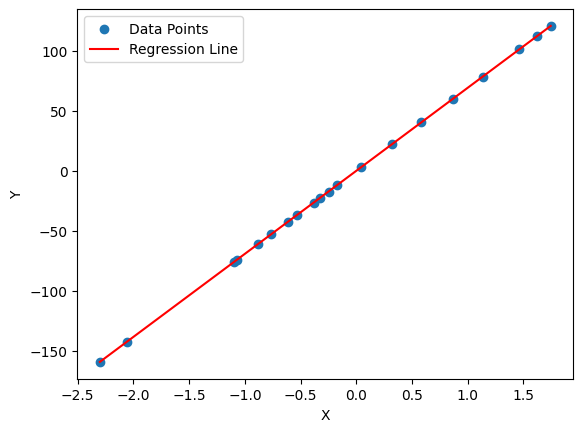

In [22]:
# Загрузка данных
data = pd.read_csv('x.csv', index_col=0)

# Проверка на DataFrame и Series
if isinstance(data, pd.Series):
    x = data
elif isinstance(data, pd.DataFrame) and len(data.columns) == 1:
    x = data.iloc[:, 0]
else:
    raise ValueError("Данные должны представлять собой Series или Dataframe с одним столбцом")

y = pd.read_csv('y.csv', index_col=0)['0']

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.0, min_error_change=0.000001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_error = self.error(X, Y)
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if prev_error - new_err < min_error_change:
                break
            prev_error = new_err

            # Проверка на увеличение ошибки
            if new_err > prev_error:
                alpha /= 2  # Уменьшаем скорость обучения вдвое
                prev_error = new_err  # Возвращаем предыдущее значение ошибки
                # Перезапускаем градиентный спуск
                step = 0
                self.b0 = 0
                self.b1 = 0

        return steps, errors

    def plot_regression(self, X, Y, X_label='X', Y_label='Y'):
        plt.scatter(X, Y, label='Data Points')
        X_min = X.min()
        X_max = X.max()
        Y_pred = self.predict(np.array([X_min, X_max]))
        plt.plot([X_min, X_max], Y_pred, 'r', label='Regression Line')
        plt.xlabel(X_label)
        plt.ylabel(Y_label)
        plt.legend()
        plt.show()

# Выполните обучение с разными начальными значениями
initial_params = (0, 0)
hyp = Model(*initial_params)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Начальные параметры:", initial_params)
print("Ошибка после градиентного спуска:", J)

# Постройте график регрессии
hyp.plot_regression(x, y)
